In [1]:
import numpy as np
import pandas as pd
import re
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

/home/user01/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')
df.duplicated().sum()

122

In [3]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

property_type                  society     sector  price  price_per_sqft  \
0          flat  signature global park 4  sector 36   0.82          7585.0   

     area  \
0  1081.0   

                                                                  areaWithType  \
0  Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.)   

   bedRoom  bathroom balcony additionalRoom  floorNum facing    agePossession  \
0        3         2       2  not available       2.0    NaN  0 to 1 Year Old   

                                                                                       nearbyLocations  \
0  ['Sector 55-56 Metro Station', 'The Leaf Mall Sohna', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd...   

  furnishDetails             features  
0            NaN  ['Lift(s)', 'Park']

## 1. areaWithType

In [4]:
df.sample(5)[['price','area','areaWithType']]

price     area                            areaWithType
2834  27.50  11286.0            Plot area 1254(1048.5 sq.m.)
3148   0.85     67.0                Plot area 67(6.22 sq.m.)
3799   6.00   6228.0              Plot area 692(578.6 sq.m.)
851    1.60   1406.0  Super Built up area 1406(130.62 sq.m.)
3699  10.56   3240.0             Plot area 360(301.01 sq.m.)

In [5]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', str(text))
    if match:
        return float(match.group(1))
    return None

# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', str(text))
    if match:
        return float(match.group(1))
    return None

# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), str(text))
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [6]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [7]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

price property_type    area  \
184    1.20          flat  1930.0   
2457   2.20          flat  2100.0   
242    5.00          flat  3000.0   
3659   1.90          flat  3344.0   
557    1.75          flat  1950.0   

                                                                                             areaWithType  \
184                                                                       Carpet area: 1930 (179.3 sq.m.)   
2457                                                                Super Built up area 2100(195.1 sq.m.)   
242   Super Built up area 3246(301.56 sq.m.)Built Up area: 3245 sq.ft. (301.47 sq.m.)Carpet area: 3000...   
3659                                                                     Carpet area: 3344 (310.67 sq.m.)   
557                                                                    Built Up area: 1950 (181.16 sq.m.)   

      super_built_up_area  built_up_area  carpet_area  
184                   NaN            NaN       1930.0  
2457               2100.0            NaN          NaN  
242                3246.0         3245.0       3000.0  
3659                  NaN            NaN       3344.0  
557                   NaN         1950.0          NaN

In [8]:
df.duplicated().sum()

122

In [11]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [10]:
df[df['areaWithType'].str.contains('Plot', na = False)][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

price property_type    area  \
9     1.2         house  1186.0   
10    4.5         house  1350.0   
15    1.2         house   846.0   
19    5.5         house  1440.0   
25    9.0         house  3240.0   

                                                       areaWithType  \
9                                   Plot area 1185.51(110.14 sq.m.)   
10                                      Plot area 150(125.42 sq.m.)   
15  Plot area 846(78.6 sq.m.)Built Up area: 846 sq.ft. (78.6 sq.m.)   
19                                      Plot area 160(133.78 sq.m.)   
25                                      Plot area 360(301.01 sq.m.)   

    super_built_up_area  built_up_area  carpet_area  
9                   NaN            NaN          NaN  
10                  NaN            NaN          NaN  
15                  NaN          846.0          NaN  
19                  NaN            NaN          NaN  
25                  NaN            NaN          NaN

In [11]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [12]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [13]:
all_nan_df.head()

price property_type    area                     areaWithType  \
9     1.2         house  1186.0  Plot area 1185.51(110.14 sq.m.)   
10    4.5         house  1350.0      Plot area 150(125.42 sq.m.)   
19    5.5         house  1440.0      Plot area 160(133.78 sq.m.)   
25    9.0         house  3240.0      Plot area 360(301.01 sq.m.)   
26    7.0         house  2475.0      Plot area 275(229.94 sq.m.)   

    super_built_up_area  built_up_area  carpet_area  
9                   NaN            NaN          NaN  
10                  NaN            NaN          NaN  
19                  NaN            NaN          NaN  
25                  NaN            NaN          NaN  
26                  NaN            NaN          NaN

In [14]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [15]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', str(area_with_type))
    return float(match.group(1)) if match else None

In [16]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [17]:
all_nan_df

price property_type      area                     areaWithType  \
9      1.20         house    1186.0  Plot area 1185.51(110.14 sq.m.)   
10     4.50         house    1350.0      Plot area 150(125.42 sq.m.)   
19     5.50         house    1440.0      Plot area 160(133.78 sq.m.)   
25     9.00         house    3240.0      Plot area 360(301.01 sq.m.)   
26     7.00         house    2475.0      Plot area 275(229.94 sq.m.)   
28     0.40         house     450.0        Plot area 50(41.81 sq.m.)   
29     5.65         house    5400.0      Plot area 600(501.68 sq.m.)   
31     4.40         house    2880.0      Plot area 320(267.56 sq.m.)   
38      NaN         house       NaN      Plot area 350(292.64 sq.m.)   
40     6.10         house    2430.0      Plot area 270(225.75 sq.m.)   
45     5.50         house    1800.0      Plot area 200(167.23 sq.m.)   
48     1.25         house   82781.0     Plot area 115(7692.86 sq.m.)   
66     0.50         house      55.0         Plot area 55(5.11 sq.m.)   
67     0.67         house     783.0        Plot area 87(72.74 sq.m.)   
70     4.15         house    2250.0      Plot area 250(209.03 sq.m.)   
74     7.60         house    1961.0      Plot area 215(179.77 sq.m.)   
77     2.99         house    1449.0      Plot area 161(134.62 sq.m.)   
81     1.50         house    1980.0      Plot area 220(183.95 sq.m.)   
96    10.45         house    3240.0      Plot area 360(301.01 sq.m.)   
119    7.49         house    2700.0      Plot area 300(250.84 sq.m.)   
126    3.20         house    2250.0      Plot area 250(209.03 sq.m.)   
127    6.95         house    1800.0      Plot area 192(160.54 sq.m.)   
136    1.95         house     920.0       Plot area 920(85.47 sq.m.)   
139    4.70         house    2160.0      Plot area 240(200.67 sq.m.)   
140    0.70         house     864.0       Plot area 864(80.27 sq.m.)   
142    6.50         house    5400.0     Plot area 5400(501.68 sq.m.)   
149    3.90         house    1836.0      Plot area 204(170.57 sq.m.)   
155    2.25         house     900.0       Plot area 100(83.61 sq.m.)   
156   11.00         house    4125.0      Plot area 500(418.06 sq.m.)   
162    4.35         house    3222.0      Plot area 358(299.33 sq.m.)   
183    6.75         house    2430.0      Plot area 270(225.75 sq.m.)   
186    1.50         house    1300.0     Plot area 1300(120.77 sq.m.)   
192    8.50         house    4770.0      Plot area 530(443.15 sq.m.)   
239    3.15         house    1548.0      Plot area 172(143.81 sq.m.)   
247    0.89         house     477.0       Plot area 477(44.31 sq.m.)   
255    3.75         house    1467.0      Plot area 163(136.29 sq.m.)   
273    3.65         house    3450.0     Plot area 3450(320.52 sq.m.)   
276    7.50         house    3240.0      Plot area 360(301.01 sq.m.)   
278    5.50         house    2592.0       Plot area 288(240.8 sq.m.)   
304     NaN         house       NaN      Plot area 670(560.21 sq.m.)   
309    5.00         house    2367.0       Plot area 263(219.9 sq.m.)   
317    5.80         house    4518.0      Plot area 502(419.74 sq.m.)   
324    6.50         house    3150.0      Plot area 350(292.64 sq.m.)   
329    2.70         house    1450.0     Plot area 1450(134.71 sq.m.)   
333    4.00         house    2250.0      Plot area 250(209.03 sq.m.)   
334    0.75         house    1170.0       Plot area 130(108.7 sq.m.)   
342    7.10         house     251.0        Plot area 240(22.3 sq.m.)   
350    8.50         house    3240.0      Plot area 360(301.01 sq.m.)   
354    6.50         house    2367.0       Plot area 263(219.9 sq.m.)   
355    0.95         house    1070.0      Plot area 1070(99.41 sq.m.)   
372    4.50         house    1800.0      Plot area 200(167.23 sq.m.)   
386    5.50         house    1000.0       Plot area 1000(92.9 sq.m.)   
392    6.50         house    2500.0     Plot area 2500(232.26 sq.m.)   
393    1.00         house    1215.0      Plot area 135(112.88 sq.m.)   
397    6.00         house    2430.0      Plot 

In [18]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [19]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [20]:
all_nan_df

price property_type      area                     areaWithType  \
9      1.20         house    1186.0  Plot area 1185.51(110.14 sq.m.)   
10     4.50         house    1350.0      Plot area 150(125.42 sq.m.)   
19     5.50         house    1440.0      Plot area 160(133.78 sq.m.)   
25     9.00         house    3240.0      Plot area 360(301.01 sq.m.)   
26     7.00         house    2475.0      Plot area 275(229.94 sq.m.)   
28     0.40         house     450.0        Plot area 50(41.81 sq.m.)   
29     5.65         house    5400.0      Plot area 600(501.68 sq.m.)   
31     4.40         house    2880.0      Plot area 320(267.56 sq.m.)   
38      NaN         house       NaN      Plot area 350(292.64 sq.m.)   
40     6.10         house    2430.0      Plot area 270(225.75 sq.m.)   
45     5.50         house    1800.0      Plot area 200(167.23 sq.m.)   
48     1.25         house   82781.0     Plot area 115(7692.86 sq.m.)   
66     0.50         house      55.0         Plot area 55(5.11 sq.m.)   
67     0.67         house     783.0        Plot area 87(72.74 sq.m.)   
70     4.15         house    2250.0      Plot area 250(209.03 sq.m.)   
74     7.60         house    1961.0      Plot area 215(179.77 sq.m.)   
77     2.99         house    1449.0      Plot area 161(134.62 sq.m.)   
81     1.50         house    1980.0      Plot area 220(183.95 sq.m.)   
96    10.45         house    3240.0      Plot area 360(301.01 sq.m.)   
119    7.49         house    2700.0      Plot area 300(250.84 sq.m.)   
126    3.20         house    2250.0      Plot area 250(209.03 sq.m.)   
127    6.95         house    1800.0      Plot area 192(160.54 sq.m.)   
136    1.95         house     920.0       Plot area 920(85.47 sq.m.)   
139    4.70         house    2160.0      Plot area 240(200.67 sq.m.)   
140    0.70         house     864.0       Plot area 864(80.27 sq.m.)   
142    6.50         house    5400.0     Plot area 5400(501.68 sq.m.)   
149    3.90         house    1836.0      Plot area 204(170.57 sq.m.)   
155    2.25         house     900.0       Plot area 100(83.61 sq.m.)   
156   11.00         house    4125.0      Plot area 500(418.06 sq.m.)   
162    4.35         house    3222.0      Plot area 358(299.33 sq.m.)   
183    6.75         house    2430.0      Plot area 270(225.75 sq.m.)   
186    1.50         house    1300.0     Plot area 1300(120.77 sq.m.)   
192    8.50         house    4770.0      Plot area 530(443.15 sq.m.)   
239    3.15         house    1548.0      Plot area 172(143.81 sq.m.)   
247    0.89         house     477.0       Plot area 477(44.31 sq.m.)   
255    3.75         house    1467.0      Plot area 163(136.29 sq.m.)   
273    3.65         house    3450.0     Plot area 3450(320.52 sq.m.)   
276    7.50         house    3240.0      Plot area 360(301.01 sq.m.)   
278    5.50         house    2592.0       Plot area 288(240.8 sq.m.)   
304     NaN         house       NaN      Plot area 670(560.21 sq.m.)   
309    5.00         house    2367.0       Plot area 263(219.9 sq.m.)   
317    5.80         house    4518.0      Plot area 502(419.74 sq.m.)   
324    6.50         house    3150.0      Plot area 350(292.64 sq.m.)   
329    2.70         house    1450.0     Plot area 1450(134.71 sq.m.)   
333    4.00         house    2250.0      Plot area 250(209.03 sq.m.)   
334    0.75         house    1170.0       Plot area 130(108.7 sq.m.)   
342    7.10         house     251.0        Plot area 240(22.3 sq.m.)   
350    8.50         house    3240.0      Plot area 360(301.01 sq.m.)   
354    6.50         house    2367.0       Plot area 263(219.9 sq.m.)   
355    0.95         house    1070.0      Plot area 1070(99.41 sq.m.)   
372    4.50         house    1800.0      Plot area 200(167.23 sq.m.)   
386    5.50         house    1000.0       Plot area 1000(92.9 sq.m.)   
392    6.50         house    2500.0     Plot area 2500(232.26 sq.m.)   
393    1.00         house    1215.0      Plot area 135(112.88 sq.m.)   
397    6.00         house    2430.0      Plot 

In [21]:
# update the original dataframe
df.update(all_nan_df)

In [22]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [23]:
df.head()

property_type                      society      sector  price  \
0          flat      signature global park 4   sector 36   0.82   
1          flat             smart world gems   sector 89   0.95   
2          flat                pyramid elite   sector 86   0.46   
3          flat       breez global hill view  sohna road   0.32   
4          flat  bestech park view sanskruti   sector 92   1.60   

   price_per_sqft     area  \
0          7585.0   1081.0   
1          8600.0   1105.0   
2            79.0  58228.0   
3          5470.0    585.0   
4          8020.0   1995.0   

                                                                                          areaWithType  \
0                          Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.)   
1                                                                     Carpet area: 1103 (102.47 sq.m.)   
2                                                                   Carpet area: 58141 (5401.48 sq.m.)   
3                                Built Up area: 1000 (92.9 sq.m.)Carpet area: 585 sq.ft. (54.35 sq.m.)   
4  Super Built up area 1995(185.34 sq.m.)Built Up area: 1615 sq.ft. (150.04 sq.m.)Carpet area: 1476...   

   bedRoom  bathroom balcony           additionalRoom  floorNum      facing  \
0        3         2       2            not available       2.0         NaN   
1        2         2       2  study room,servant room       4.0         NaN   
2        2         2       1            not available       0.0         NaN   
3        2         2       1            not available      17.0         NaN   
4        3         4      3+      servant room,others      10.0  North-West   

        agePossession  \
0     0 to 1 Year Old   
1     Within 6 months   
2  Under Construction   
3     0 to 1 Year Old   
4     1 to 5 Year Old   

                                                                                       nearbyLocations  \
0  ['Sector 55-56 Metro Station', 'The Leaf Mall Sohna', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd...   
1  ['Sant Soordas Sihi Metro Station', 'Airia Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH-8', '...   
2  ['V3S Sapphire Ninety Mall', 'Sector 86 Road', 'Dwarka Expy', 'RPS International School', 'SGT U...   
3  ['Huda City Centre', 'Omaxe City Centre', 'Ninex City Mart', 'Vaels Ravindra Bharathi Global Sch...   
4  ['Sapphire 93 Mall', 'Dwarka Expressway', 'NH-8, Imt Manesar', 'Western Peripheral Expressway', ...   

                                                                                        furnishDetails  \
0                                                                                                  NaN   
1                                                                                                  NaN   
2                                                                                                   []   
3                                                                                                   []   
4  ['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Geyser', '15 Light', '5 AC', '1 Chimney', '4 Curtain...   

                                                                                              features  \
0                                                                                  ['Lift(s)', 'Park']   
1  ['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Interne...   
2                                                             ['Intercom Facility', 'Lift(s)', 'Park']   
3  ['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maint...   
4  ['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Com...   

   super_built_up_area  built_up_area  carpet_area  
0               1081.0            NaN        650.0  
1                  NaN            NaN       1103.0  
2                  NaN            NaN      58141.0  
3                  NaN         1

## 2.additionalRoom

In [24]:
df['additionalRoom'].value_counts()

not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,store room,study 

In [25]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col, na = False).astype(int)

In [26]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

additionalRoom  study room  servant room  \
3593  pooja room,study room,servant room,others           1             1   
2265                              not available           0             0   
90                                not available           0             0   
295                           pooja room,others           0             0   
3219                              not available           0             0   

      store room  pooja room  others  
3593           0           1       1  
2265           0           0       0  
90             0           0       0  
295            0           1       1  
3219           0           0       0

In [27]:
df.head(1)

property_type                  society     sector  price  price_per_sqft  \
0          flat  signature global park 4  sector 36   0.82          7585.0   

     area  \
0  1081.0   

                                                                  areaWithType  \
0  Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.)   

   bedRoom  bathroom balcony additionalRoom  floorNum facing    agePossession  \
0        3         2       2  not available       2.0    NaN  0 to 1 Year Old   

                                                                                       nearbyLocations  \
0  ['Sector 55-56 Metro Station', 'The Leaf Mall Sohna', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd...   

  furnishDetails             features  super_built_up_area  built_up_area  \
0            NaN  ['Lift(s)', 'Park']               1081.0            NaN   

   carpet_area  study room  servant room  store room  pooja room  others  
0        650.0           0             0           0           0       0

## 3.agePossession

In [28]:
df['agePossession'].value_counts()

1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Aug 2023                 7
Dec 2025                 7
Jun 2024                 7
Nov 2023                 5
Aug 2024                 4
Sep 2023                 4
Jul 2024                 4
Oct 2023                 4
By 2025                  4
Nov 2024                 3
May 2024                 3
Feb 2024                 3
Jan 2025                 3
By 2027                  2
Sep 2025                 2
Dec 2026                 2
Jul 2025                 2
Jan 2026                 2
Jun 2027                 2
Jul 2027                 2
Mar 2025                 2
Oct 2025                 2
A

In [29]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [30]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [31]:
df['agePossession'].value_counts()

Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: agePossession, dtype: int64

In [32]:
df.head()

property_type                      society      sector  price  \
0          flat      signature global park 4   sector 36   0.82   
1          flat             smart world gems   sector 89   0.95   
2          flat                pyramid elite   sector 86   0.46   
3          flat       breez global hill view  sohna road   0.32   
4          flat  bestech park view sanskruti   sector 92   1.60   

   price_per_sqft     area  \
0          7585.0   1081.0   
1          8600.0   1105.0   
2            79.0  58228.0   
3          5470.0    585.0   
4          8020.0   1995.0   

                                                                                          areaWithType  \
0                          Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.)   
1                                                                     Carpet area: 1103 (102.47 sq.m.)   
2                                                                   Carpet area: 58141 (5401.48 sq.m.)   
3                                Built Up area: 1000 (92.9 sq.m.)Carpet area: 585 sq.ft. (54.35 sq.m.)   
4  Super Built up area 1995(185.34 sq.m.)Built Up area: 1615 sq.ft. (150.04 sq.m.)Carpet area: 1476...   

   bedRoom  bathroom balcony           additionalRoom  floorNum      facing  \
0        3         2       2            not available       2.0         NaN   
1        2         2       2  study room,servant room       4.0         NaN   
2        2         2       1            not available       0.0         NaN   
3        2         2       1            not available      17.0         NaN   
4        3         4      3+      servant room,others      10.0  North-West   

        agePossession  \
0        New Property   
1        New Property   
2  Under Construction   
3        New Property   
4      Relatively New   

                                                                                       nearbyLocations  \
0  ['Sector 55-56 Metro Station', 'The Leaf Mall Sohna', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd...   
1  ['Sant Soordas Sihi Metro Station', 'Airia Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH-8', '...   
2  ['V3S Sapphire Ninety Mall', 'Sector 86 Road', 'Dwarka Expy', 'RPS International School', 'SGT U...   
3  ['Huda City Centre', 'Omaxe City Centre', 'Ninex City Mart', 'Vaels Ravindra Bharathi Global Sch...   
4  ['Sapphire 93 Mall', 'Dwarka Expressway', 'NH-8, Imt Manesar', 'Western Peripheral Expressway', ...   

                                                                                        furnishDetails  \
0                                                                                                  NaN   
1                                                                                                  NaN   
2                                                                                                   []   
3                                                                                                   []   
4  ['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Geyser', '15 Light', '5 AC', '1 Chimney', '4 Curtain...   

                                                                                              features  \
0                                                                                  ['Lift(s)', 'Park']   
1  ['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Interne...   
2                                                             ['Intercom Facility', 'Lift(s)', 'Park']   
3  ['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maint...   
4  ['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Com...   

   super_built_up_area  built_up_area  carpet_area  study room  servant room  \
0               1081.0            NaN        650.0           0             0   
1                  NaN            NaN       1103.0           1             1   
2   

## 4.furnishDetails

In [33]:
df.sample(5)[['furnishDetails','features']]

furnishDetails  \
1183                                                                                                  NaN   
661                                                                                                   NaN   
3386  ['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Ta...   
3584  ['5 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', '...   
2502  ['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan',...   

                                                                                                 features  
1183  ['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water Storage', 'No open drainage ...  
661   ['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maint...  
3386                                                                                                  NaN  
3584  ['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maint...  
2502                                                                                                  NaN

In [34]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


In [35]:
furnishings_df.shape

(3803, 19)

In [36]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

/tmp/ipykernel_8285/114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [37]:
furnishings_df.sample(5)

Light  TV  Water Purifier  Fridge  Washing Machine  Modular Kitchen  \
1363     10   0               0       0                0                1   
3498      0   0               0       0                0                0   
3362      0   0               0       0                0                1   
1126      0   0               0       0                0                1   
1963      9   0               0       0                0                1   

      Curtains  Stove  Bed  Chimney  Fan  Geyser  AC  Microwave  Wardrobe  \
1363         0      0    0        1    0       2   5          0         6   
3498         0      0    0        0    4       4   5          0         0   
3362         0      1    0        1    0       0   5          0         0   
1126         0      0    0        0    0       0   8          0         0   
1963         4      0    0        0    0       4   1          0         4   

      Exhaust Fan  Sofa  Dining Table  
1363            1     0             0  
3498            0     0             0  
3362            0     0             0  
1126            0     0             0  
1963            0     0             0

In [38]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [40]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

/home/user01/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/user01/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/user01/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/user01/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/user01/.local/lib/python3.8/si

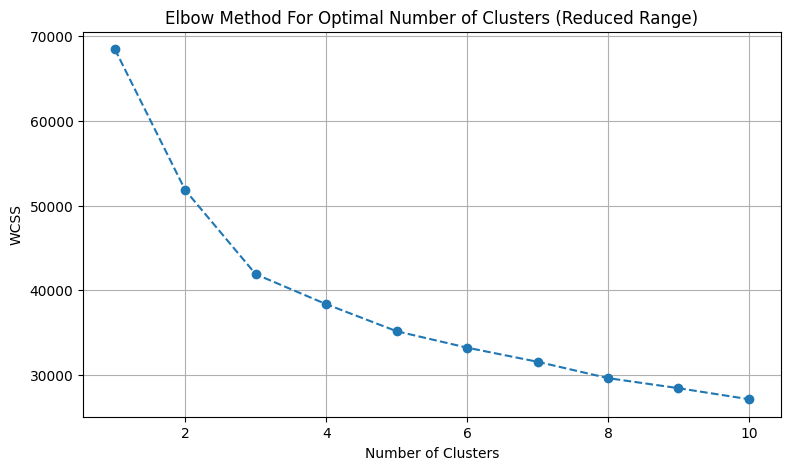

In [41]:
# Plot the results
plt.figure(figsize=(9, 5))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [42]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

/home/user01/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [43]:
df = df.iloc[:,:-18]

In [44]:
df['furnishing_type'] = cluster_assignments

In [45]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

furnishDetails  \
786   ['5 Fan', '1 Exhaust Fan', '2 Geyser', '10 Light', '4 AC', '1 Chimney', '1 Modular Kitchen', '2 ...   
1331  ['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan',...   
589   ['1 Wardrobe', '1 Fan', '1 Light', '1 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curta...   
3065                                                                                                   []   
2345  ['2 Wardrobe', '4 Fan', '2 Geyser', '15 Light', '1 Modular Kitchen', '1 Chimney', '1 Curtains', ...   

      furnishing_type  
786                 1  
1331                0  
589                 0  
3065                0  
2345                1

## 5.features

In [46]:
df[['society','features']].sample(5)

society  \
2218            imperia the esfera   
3728               eldeco accolade   
3481                    sare homes   
1071         pyramid urban homes 2   
1807  nagata group housing society   

                                                                                                 features  
2218  ['Intercom Facility', 'Lift(s)', 'Feng Shui / Vaastu Compliant', 'Swimming Pool', 'Park', 'Secur...  
3728  ['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Com...  
3481  ['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maint...  
1071  ['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maint...  
1807                                                        ['Feng Shui / Vaastu Compliant', 'Piped-gas']

In [47]:
df['features'].isnull().sum()

635

In [48]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

PropertyName                               PropertySubName  \
0  Smartworld One DXP  2, 3, 4 BHK Apartment in Sector 113, Gurgaon   
1           M3M Crown     3, 4 BHK Apartment in Sector 111, Gurgaon   

                                                                                       NearbyLocations  \
0  ['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Stat...   
1  ['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific ...   

                                                                                    LocationAdvantages  \
0  {'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park...   
1  {'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Pal...   

                                                                          Link  \
0  https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415   
1           https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068   

                                                                                          PriceDetails  \
0  {'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'pr...   
1  {'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,...   

                                                                                         TopFacilities  
0  ['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club ...  
1  ['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading...

In [49]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [50]:
temp_df = df[df['features'].isnull()]

In [51]:
temp_df.shape

(635, 26)

In [54]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [55]:
df.loc[temp_df.index,'features'] = x.values

In [56]:
df['features'].isnull().sum()

481

In [57]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [58]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [59]:
features_binary_df.sample(5)

24/7 Power Backup  24/7 Water Supply  24x7 Security  ATM  \
2864                  0                  0              0    0   
2200                  0                  0              0    0   
890                   0                  0              0    0   
728                   0                  0              0    0   
1029                  0                  0              0    0   

      Aerobics Centre  Air Hockey  Airy Rooms  Amphitheatre  \
2864                0           0           1             0   
2200                0           0           0             0   
890                 0           0           1             0   
728                 0           0           0             0   
1029                0           0           0             0   

      Automated Car Wash  Badminton Court  Bank Attached Property  \
2864                   0                0                       1   
2200                   0                0                       0   
890                    0                0                       0   
728                    0                0                       0   
1029                   0                0                       0   

      Banquet Hall  Bar/Chill-Out Lounge  Barbecue  Basketball Court  \
2864             0                     0         0                 0   
2200             0                     0         0                 0   
890              0                     0         0                 0   
728              0                     0         0                 0   
1029             0                     0         0                 0   

      Beach Volley Ball Court  Billiards  Bowling Alley  Bus Shelter  \
2864                        0          0              0            0   
2200                        0          0              0            0   
890                         0          0              0            0   
728                         0          0              0            0   
1029                        0          0              0            0   

      Business Lounge  CCTV Camera Security  Cafeteria  Car Parking  \
2864                0                     0          0            0   
2200                0                     0          0            0   
890                 0                     0          0            0   
728                 0                     0          0            0   
1029                0                     0          0            0   

      Car wash area  Card Room  Centrally Air Conditioned  Changing Area  \
2864              0          0                          0              0   
2200              0          0                          0              0   
890               0          0                          0              0   
728               0          0                          0              0   
1029              0          0                          0              0   

      Children's Play Area  Cigar Lounge  Clinic  Club House  \
2864                     0             0       0           0   
2200                     0             0       0           0   
890                      0             0       0           0   
728                      0             0       0           0   
1029                     0             0       0           0   

      Club house / Community Center  Community Hall  Concierge Service  \
2864                              1               0                  0   
2200                              0               0                  0   
890                               1               0                  0   
728                               1               0                  0   
1029                              0               0                  0   

      Conference room  Creche/Day care  Cricket Pitch  Doctor on Call  \
2864                0                0              0               0   
2200                0                0              0               0   
890             

In [60]:
features_binary_df.shape

(3803, 130)

In [61]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

/home/user01/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/user01/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/user01/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/user01/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/user01/.local/lib/python3.8/si

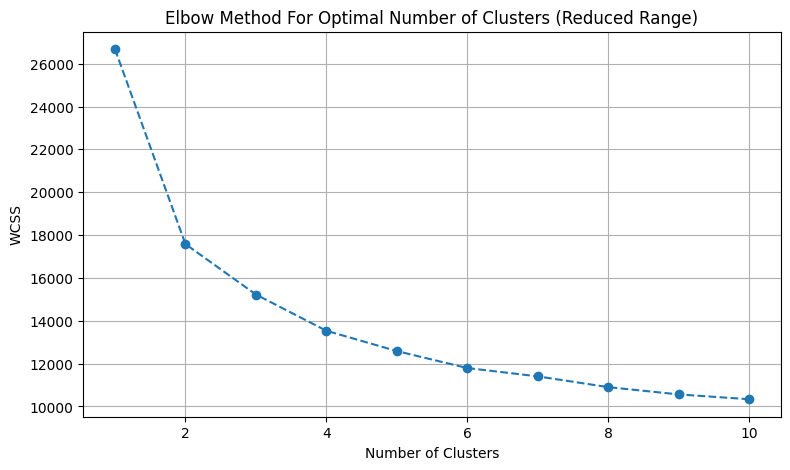

In [62]:
# Plot the results
plt.figure(figsize=(9, 5))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [63]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [64]:
df['luxury_score'] = luxury_score

In [65]:
df.head()

property_type                      society      sector  price  \
0          flat      signature global park 4   sector 36   0.82   
1          flat             smart world gems   sector 89   0.95   
2          flat                pyramid elite   sector 86   0.46   
3          flat       breez global hill view  sohna road   0.32   
4          flat  bestech park view sanskruti   sector 92   1.60   

   price_per_sqft     area  \
0          7585.0   1081.0   
1          8600.0   1105.0   
2            79.0  58228.0   
3          5470.0    585.0   
4          8020.0   1995.0   

                                                                                          areaWithType  \
0                          Super Built up area 1081(100.43 sq.m.)Carpet area: 650 sq.ft. (60.39 sq.m.)   
1                                                                     Carpet area: 1103 (102.47 sq.m.)   
2                                                                   Carpet area: 58141 (5401.48 sq.m.)   
3                                Built Up area: 1000 (92.9 sq.m.)Carpet area: 585 sq.ft. (54.35 sq.m.)   
4  Super Built up area 1995(185.34 sq.m.)Built Up area: 1615 sq.ft. (150.04 sq.m.)Carpet area: 1476...   

   bedRoom  bathroom balcony           additionalRoom  floorNum      facing  \
0        3         2       2            not available       2.0         NaN   
1        2         2       2  study room,servant room       4.0         NaN   
2        2         2       1            not available       0.0         NaN   
3        2         2       1            not available      17.0         NaN   
4        3         4      3+      servant room,others      10.0  North-West   

        agePossession  \
0        New Property   
1        New Property   
2  Under Construction   
3        New Property   
4      Relatively New   

                                                                                       nearbyLocations  \
0  ['Sector 55-56 Metro Station', 'The Leaf Mall Sohna', 'Omaxe Gurgaon Mall', 'Badshahpur Sohna Rd...   
1  ['Sant Soordas Sihi Metro Station', 'Airia Mall', 'Dwarka Expressway', 'Pataudi Road', 'NH-8', '...   
2  ['V3S Sapphire Ninety Mall', 'Sector 86 Road', 'Dwarka Expy', 'RPS International School', 'SGT U...   
3  ['Huda City Centre', 'Omaxe City Centre', 'Ninex City Mart', 'Vaels Ravindra Bharathi Global Sch...   
4  ['Sapphire 93 Mall', 'Dwarka Expressway', 'NH-8, Imt Manesar', 'Western Peripheral Expressway', ...   

                                                                                        furnishDetails  \
0                                                                                                  NaN   
1                                                                                                  NaN   
2                                                                                                   []   
3                                                                                                   []   
4  ['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Geyser', '15 Light', '5 AC', '1 Chimney', '4 Curtain...   

                                                                                              features  \
0                                                                                  ['Lift(s)', 'Park']   
1  ['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Piped-gas', 'Interne...   
2                                                             ['Intercom Facility', 'Lift(s)', 'Park']   
3  ['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maint...   
4  ['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Com...   

   super_built_up_area  built_up_area  carpet_area  study room  servant room  \
0               1081.0            NaN        650.0           0             0   
1                  NaN            NaN       1103.0           1             1   
2   

In [66]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [67]:
df.sample(5)

property_type                  society      sector  price  \
2068          flat          raheja navodaya   sector 92   0.62   
3242          flat            orchid petals   sector 49   4.21   
1251          flat              m3m skywalk   sector 74   1.48   
3726          flat  la vida by tata housing  sector 113   1.35   
1379          flat                  elevate   sector 50   6.75   

      price_per_sqft    area  \
2068          4807.0  1290.0   
3242         11835.0  3557.0   
1251         12333.0  1200.0   
3726         13989.0   965.0   
1379         19882.0  3395.0   

                                                                                             areaWithType  \
2068                             Built Up area: 1498 (139.17 sq.m.)Carpet area: 1064 sq.ft. (98.85 sq.m.)   
3242                                                               Super Built up area 3557(330.46 sq.m.)   
1251  Super Built up area 1400(130.06 sq.m.)Built Up area: 1300 sq.ft. (120.77 sq.m.)Carpet area: 1200...   
3726  Super Built up area 1276(118.54 sq.m.)Built Up area: 1090 sq.ft. (101.26 sq.m.)Carpet area: 965 ...   
1379                                                                   Built Up area: 3395 (315.41 sq.m.)   

      bedRoom  bathroom balcony  floorNum      facing   agePossession  \
2068        2         2       2       5.0         NaN    New Property   
3242        5         6      3+      14.0  South-East  Relatively New   
1251        2         2       3      13.0  North-East  Relatively New   
3726        2         2       3      10.0  North-East    New Property   
1379        4         4       0      10.0         NaN       Undefined   

      super_built_up_area  built_up_area  carpet_area  study room  \
2068                  NaN         1498.0       1064.0           0   
3242               3557.0            NaN          NaN           0   
1251               1400.0         1300.0       1200.0           0   
3726               1276.0         1090.0        965.0           0   
1379                  NaN         3395.0          NaN           0   

      servant room  store room  pooja room  others  furnishing_type  \
2068             0           0           0       0                0   
3242             1           0           1       0                0   
1251             0           1           0       0                0   
3726             0           0           0       0                0   
1379             0           0           0       0                0   

      luxury_score  
2068             0  
3242            35  
1251           158  
3726           174  
1379             0

In [68]:
df.shape

(3803, 23)

In [69]:
df

property_type                                            society  \
0             flat                            signature global park 4   
1             flat                                   smart world gems   
2             flat                                      pyramid elite   
3             flat                             breez global hill view   
4             flat                        bestech park view sanskruti   
5             flat                                     suncity avenue   
6             flat                                     paras quartier   
7             flat                             experion the heartsong   
8             flat                            adani m2k oyster grande   
9            house                                        independent   
10           house                                   dlf city phase 1   
11           house                                        independent   
12            flat                                   dlf regency park   
13            flat                                     ats tourmaline   
14            flat                   emaar mgf emerald floors premier   
15           house                                        independent   
16            flat                        bestech park view sanskruti   
17            flat                                        ss the leaf   
18            flat                             capital residences 360   
19           house                                        independent   
20            flat                                        ss the leaf   
21            flat                                afnhb jalvayu vihar   
22            flat                                      m3m woodshire   
23            flat                                     godrej habitat   
24            flat                         ansal api celebrity suites   
25           house                                        independent   
26           house                                        independent   
27            flat                                 chanderlok society   
28           house                                        independent   
29           house                international city by sobha phase 2   
30            flat                                    emaar digihomes   
31           house                                     uppal southend   
32            flat                                      vipul lavanya   
33            flat                                        m3m heights   
34            flat                           emaar mgf the palm drive   
35           house                                        greenopolis   
36            flat                                   dlf the skycourt   
37           house                                        independent   
38           house                                 emaar mgf marbella   
39           house                                 vipul tatvam villa   
40           house                international city by sobha phase 1   
41            flat                                     the arzoo cghs   
42            flat                                       corona optus   
43            flat                                         lotus homz   
44            flat                                         m3m merlin   
45           house                               housing board colony   
46            flat                             puri diplomatic greens   
47            flat                            la vida by tata housing   
48           house                          ganpati heights apartment   
49            flat                                smart world orchard   
50            flat                               tata gurgaon gateway   
51            flat                                       tulip violet   
52            flat                                   smart world gems   
53            flat                                 ireo the cor

In [555]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)